## Design of Experiments

This research adopted the Sliding Window Cross Validation approach for evaluating the performance of a set of forecasting methods $\mathcal{M}$ over a set of datasets $\mathcal{D}$. 

Each dataset $\mathcal{d}_j \in \mathcal{D}$ was splited in $k = 31$ overlapped data windows with $W = 2000$ samples, each one of them shifted by $I = 200$ instances from left to the right.

For each data window $\mathcal{d}_{w,j} \in \mathcal{d}_j$, where $w=1\ldots k$ and $j=1\ldots |\mathcal{D}|$, a forecasting model $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ is trained and tested, for each forecasting method $\mathcal{m}_i \in \mathcal{M}$. The train and test subsets of $\mathcal{d}_{w,j}$ have a 80%/20% proportion.

The performance $\epsilon[m_i, d_j, w]$ of each $\mathcal{m}_{i}^{\mathcal{d}_{w,j}}$ model is evaluated using the RMSE metric using the test subset of $\mathcal{d}_{w,j}$.

## Statistical Testing

Given the mean $\mu_{m_i, d_j} = \frac{\sum_{w=1}^W \epsilon[m_i, d_j, w]}{W}$,  ANOVA aims to test the hypothesis:

* $H_0$: The $\mu_{m_i, d_j}$ means are equal 
* $H_1$: At least one $\mu_{m_i, d_j}$ mean are not equal

For the parametric ANOVA test, the F-test, some conditions must be respected:

a) The samples must be independent and equaly distributed (i.i.d)

b) The samples must be normally distributed;

c) The samples must be homoskedastic (the variances must be equal)

For the nonparametric tests there are no conditions.

When the $H_0$ is rejected it means that the samples can be not equal, and therefore we need to compare all samples against themselves. This is called *post-hoc* tests.

* $H_0$: $\mu_{m_a, d_j} < \mu_{m_b, d_j}$
* $H_1$: $\mu_{m_a, d_j}\geq \mu_{m_b, d_j}$

## Experiment Data

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('data_ht.csv', sep=',')
#df.head()
pd.set_option('display.max_rows', None)
df

,ds,model,window,avg_nrmse
0,AEC,KFTS,0,0.055
1,AEC,KFTS,1,0.045
2,AEC,KFTS,2,0.045
3,AEC,KFTS,3,0.049
4,AEC,KFTS,4,0.047
5,AEC,KFTS,5,0.044
6,AEC,KFTS,6,0.051
7,AEC,KFTS,7,0.044
8,AEC,KFTS,8,0.048
9,AEC,KFTS,9,0.053


In [51]:
datasets = df['ds'].unique()
datasets

array(['AEC', 'KSH', 'AQI', 'AQB1', 'AQB6', 'AQB12'], dtype=object)

In [52]:
methods = df['model'].unique()
# methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SLSTM2', 'SVR']
methods = ['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SVR']
list(methods)

['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SVR']

## Experiment Histograms

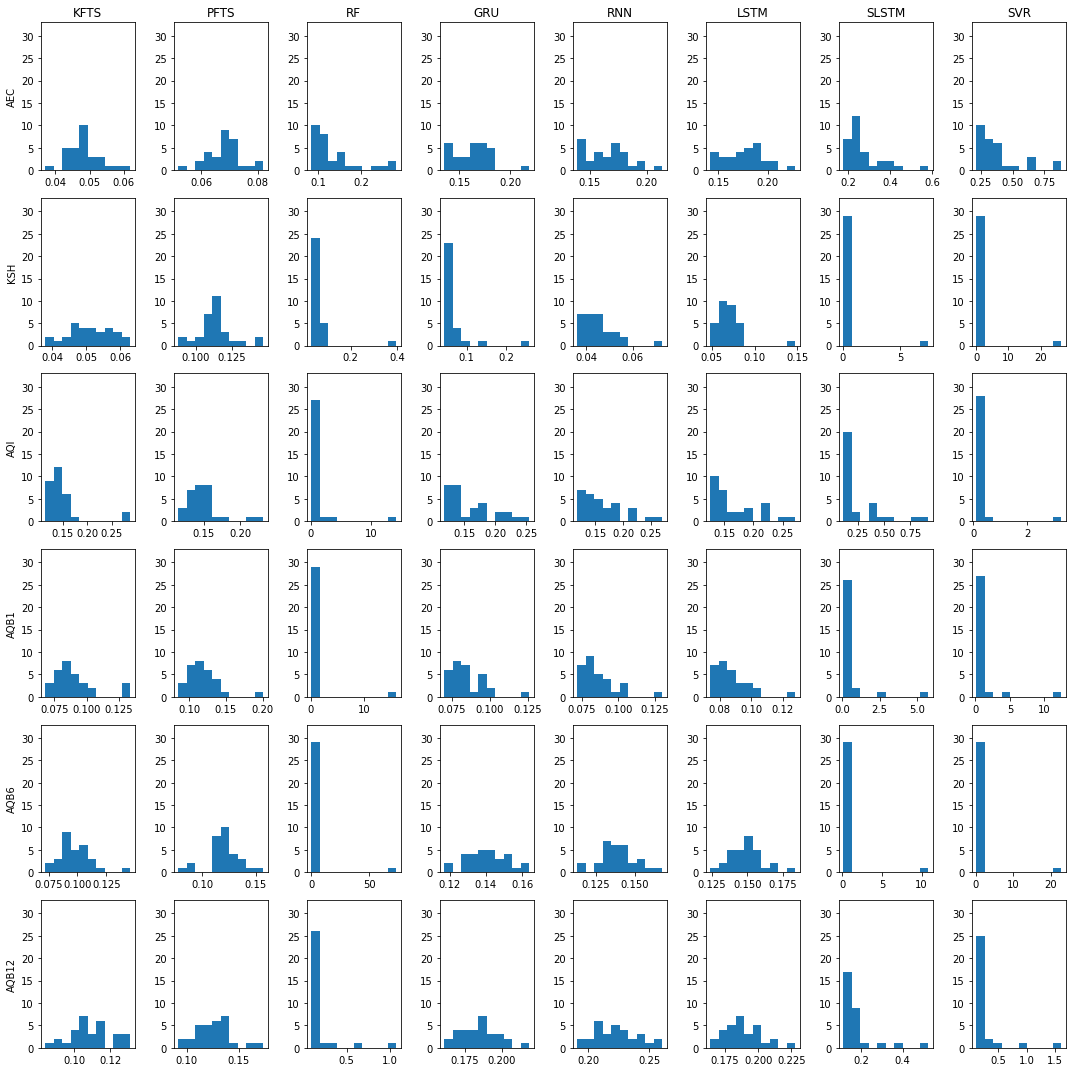

In [53]:
datasets2 = list(datasets)#['AEC', 'KSH', 'AQI', 'AQB1', 'AQB6', 'AQB12']

#datasets2 = ['AQI', 'AQB1', 'AQB6', 'AQB12']

methods2 = list(methods) #['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

num_rows = len(datasets2)
num_cols = len(methods2)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for count1, dataset in enumerate(datasets2):

  for count2, method in enumerate(methods2):
    tmp = df[(df['ds'] == dataset) & (df['model'] == method)]['avg_nrmse']

    ax[count1][count2].hist(tmp)

    ax[count1][count2].set_ylim([0, 33])

    if count2 == 0:
      ax[count1][count2].set_ylabel(dataset)
    
    if count1 == 0:
      ax[count1][count2].set_title(method)

plt.tight_layout()


## Hypothesis Test

- Anova Test - Kruskal Wallis
- Post Hoc: Wilcoxon

$\alpha = .01$

In [59]:
from scipy import stats
import itertools

anova_result = {
    "dataset": [],
    "statistic": [],
    "pvalue": [],
    "result": []
}

posthoc_result = {
    "dataset": [],
    "methods": [],
    "statistic": [],
    "pvalue": [],
    "result": []
}

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']
print(list(methods))

alpha = 0.01

anova_test = stats.kruskal #stats.friedmanchisquare #stats.kruskal 
post_hoc_test = stats.wilcoxon

for dataset in datasets:
  #if dataset != 'SONDA':
    samples = []
    for method in competing_methods:
      sample = df[(df['ds'] == dataset) & (df['model'] == method)]['avg_nrmse']
      #print(sample)
      samples.append(sample)

    result = anova_test(*samples)

    if result.pvalue > alpha:
      test = 'Fail to Reject H0'
    else:
      test = 'H0 rejected'

    print('ANOVA {} result: {}, {}'.format(dataset, result, test))
    
    anova_result["dataset"].append(dataset)
    anova_result["statistic"].append(result.statistic)
    anova_result["pvalue"].append(result.pvalue)
    anova_result["result"].append(test)

    if result.pvalue < alpha:
      for a,b in itertools.product(competing_methods , competing_methods):
        if a != b:
          i = competing_methods.index(a)
          j = competing_methods.index(b)
          result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

          if result2.pvalue > alpha:
            test = 'Fail to Reject H0'
          else:
            test = 'H0 rejected'

          print('\t Wilcoxon {} x {} = {}, {}'.format(a,b,result2, test))
          
          posthoc_result["dataset"].append(dataset)
          posthoc_result["methods"].append(a + " x " + b)
          posthoc_result["statistic"].append(result2.statistic)
          posthoc_result["pvalue"].append(result2.pvalue)
          posthoc_result["result"].append(test)

    print("")

['KFTS', 'PFTS', 'RF', 'GRU', 'RNN', 'LSTM', 'SLSTM', 'SVR']
ANOVA AEC result: KruskalResult(statistic=204.83402866459977, pvalue=1.0860153859818442e-40), H0 rejected
	 Wilcoxon KFTS x PFTS = WilcoxonResult(statistic=0.0, pvalue=0.9999991447360034), Fail to Reject H0
	 Wilcoxon KFTS x RF = WilcoxonResult(statistic=0.0, pvalue=0.9999991328011858), Fail to Reject H0
	 Wilcoxon KFTS x GRU = WilcoxonResult(statistic=0.0, pvalue=0.9999991338918834), Fail to Reject H0
	 Wilcoxon KFTS x RNN = WilcoxonResult(statistic=0.0, pvalue=0.9999991338918834), Fail to Reject H0
	 Wilcoxon KFTS x LSTM = WilcoxonResult(statistic=0.0, pvalue=0.9999991360698426), Fail to Reject H0
	 Wilcoxon KFTS x SLSTM = WilcoxonResult(statistic=0.0, pvalue=0.9999991338918834), Fail to Reject H0
	 Wilcoxon KFTS x SVR = WilcoxonResult(statistic=0.0, pvalue=0.9999991333466779), Fail to Reject H0
	 Wilcoxon PFTS x KFTS = WilcoxonResult(statistic=465.0, pvalue=8.552639966200389e-07), H0 rejected
	 Wilcoxon PFTS x RF = Wilcoxo

In [60]:
df_anova_result = pd.DataFrame(anova_result)
df_anova_result

,dataset,statistic,pvalue,result
0,AEC,204.834029,1.086015e-40,H0 rejected
1,KSH,151.692018,1.791069e-29,H0 rejected
2,AQI,7.411324,3.873441e-01,Fail to Reject H0
3,AQB1,113.241282,1.950220e-21,H0 rejected
4,AQB6,126.860648,2.843852e-24,H0 rejected
5,AQB12,158.052406,8.241154e-31,H0 rejected


In [61]:
print(len(posthoc_result['dataset']))
print(len(posthoc_result['methods']))

280
280


In [62]:
df_posthoc_result = pd.DataFrame(posthoc_result, columns=list(posthoc_result.keys()))
df_posthoc_result

,dataset,methods,statistic,pvalue,result
0,AEC,KFTS x PFTS,0.0,9.999991e-01,Fail to Reject H0
1,AEC,KFTS x RF,0.0,9.999991e-01,Fail to Reject H0
2,AEC,KFTS x GRU,0.0,9.999991e-01,Fail to Reject H0
3,AEC,KFTS x RNN,0.0,9.999991e-01,Fail to Reject H0
4,AEC,KFTS x LSTM,0.0,9.999991e-01,Fail to Reject H0
5,AEC,KFTS x SLSTM,0.0,9.999991e-01,Fail to Reject H0
6,AEC,KFTS x SVR,0.0,9.999991e-01,Fail to Reject H0
7,AEC,PFTS x KFTS,465.0,8.552640e-07,H0 rejected
8,AEC,PFTS x RF,0.0,9.999991e-01,Fail to Reject H0
9,AEC,PFTS x GRU,0.0,9.999991e-01,Fail to Reject H0


### Rankings

In [63]:
from scipy import stats
import itertools

competing_methods = list(methods)#['KFTS', 'PFTS', 'VAR', 'SLSTM', 'LSTM', 'GRU', 'RNN', 'RF', 'SVR']

anova_test = stats.kruskal #stats.friedmanchisquare #stats.kruskal #stats.friedmanchisquare
post_hoc_test = stats.wilcoxon

final_ranking = []

for dataset in datasets:
  #if dataset != 'SONDA':
    samples = []
    for method in competing_methods:
      sample = df[(df['ds'] == dataset) & (df['model'] == method)]['avg_nrmse']
      samples.append(sample)

    result = anova_test(*samples)

    if result.pvalue < alpha:
      
      post_hoc = {k: 0 for k in competing_methods}
      
      for a,b in itertools.product(competing_methods , competing_methods):
        if a != b:
          i = competing_methods.index(a)
          j = competing_methods.index(b)
          result2 = post_hoc_test(samples[i],samples[j],alternative='greater') 

          if result2.pvalue > alpha:
            post_hoc[a] += 1
      
      print(post_hoc)
      ranking = [len(methods) - v for v in post_hoc.values()]

      ranking.insert(0, dataset)

      final_ranking.append(ranking)


columns = competing_methods.copy()

columns.insert(0,'Dataset')

df_final_ranking = pd.DataFrame(final_ranking, columns=columns) 

#print("")
df_final_ranking

{'KFTS': 7, 'PFTS': 6, 'RF': 5, 'GRU': 4, 'RNN': 4, 'LSTM': 2, 'SLSTM': 1, 'SVR': 0}
{'KFTS': 6, 'PFTS': 1, 'RF': 6, 'GRU': 5, 'RNN': 7, 'LSTM': 3, 'SLSTM': 3, 'SVR': 0}
{'KFTS': 5, 'PFTS': 3, 'RF': 3, 'GRU': 7, 'RNN': 6, 'LSTM': 5, 'SLSTM': 3, 'SVR': 0}
{'KFTS': 7, 'PFTS': 6, 'RF': 6, 'GRU': 4, 'RNN': 4, 'LSTM': 2, 'SLSTM': 5, 'SVR': 0}
{'KFTS': 7, 'PFTS': 6, 'RF': 6, 'GRU': 3, 'RNN': 1, 'LSTM': 2, 'SLSTM': 4, 'SVR': 3}


,Dataset,KFTS,PFTS,RF,GRU,RNN,LSTM,SLSTM,SVR
0,AEC,1,2,3,4,4,6,7,8
1,KSH,2,7,2,3,1,5,5,8
2,AQB1,3,5,5,1,2,3,5,8
3,AQB6,1,2,2,4,4,6,3,8
4,AQB12,1,2,2,5,7,6,4,5


In [25]:
df_final_ranking.to_csv(r'final_ranking.csv', index = False, header=True)

In [48]:
#post_hoc.values()